# Running Machine Learning models

In [2]:
# Import our dependencies
import math
# import pandas_datareader as web

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import datetime
import tensorflow as tf
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

from cryptocompare_config import API_Key
import requests
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [3]:
Daily_News_df = pd.read_csv("Daily_Coinwise_Senti_score(2016to2021).csv")
Daily_News_df

,Unnamed: 0,Dt_Rev_time,Coin_Symbol,Polarity
0,0,2016-07-11,BUSD,0.331579
1,1,2016-07-11,DOGE,0.331579
2,2,2016-07-11,XLM,0.331579
3,3,2016-07-23,BUSD,0.285714
4,4,2016-07-23,DOGE,0.285714
...,...,...,...,...
12899,12899,2021-07-06,ETH,0.064185
12900,12900,2021-07-06,LTC,0.136327
12901,12901,2021-07-06,USDT,0.081108
12902,12902,2021-07-06,XLM,0.095572


In [4]:
# selecting rows based on condition
df = Daily_News_df[(Daily_News_df['Coin_Symbol'] == 'USDT')]
df

,Unnamed: 0,Dt_Rev_time,Coin_Symbol,Polarity
231,231,2017-10-01,USDT,0.010417
239,239,2017-10-02,USDT,0.016667
247,247,2017-10-03,USDT,0.053438
480,480,2017-11-08,USDT,0.200000
494,494,2017-11-10,USDT,0.065075
...,...,...,...,...
12854,12854,2021-07-01,USDT,0.161992
12863,12863,2021-07-02,USDT,-0.011648
12872,12872,2021-07-03,USDT,0.126786
12891,12891,2021-07-05,USDT,0.109259


In [5]:
df.drop('Unnamed: 0', axis=1)

,Dt_Rev_time,Coin_Symbol,Polarity
231,2017-10-01,USDT,0.010417
239,2017-10-02,USDT,0.016667
247,2017-10-03,USDT,0.053438
480,2017-11-08,USDT,0.200000
494,2017-11-10,USDT,0.065075
...,...,...,...
12854,2021-07-01,USDT,0.161992
12863,2021-07-02,USDT,-0.011648
12872,2021-07-03,USDT,0.126786
12891,2021-07-05,USDT,0.109259


In [6]:
# import bitcoin 5 year data
Tether_df = pd.read_csv("C:/UC_Berkeley/Analysis_Projects_Class_Folder/Module20_Final_Project/Cryptocurrency-Analysis/Data/Tether(fiveyears).csv")
Tether_df

,Unnamed: 0,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,491,Tether,2016-07-06 23:59:59,1.000000,1.000000,1.000000,1.000000,5.679090e+05,5.951591e+06
1,492,Tether,2016-07-07 23:59:59,1.000000,0.999989,1.000000,0.999991,1.875330e+06,5.951537e+06
2,493,Tether,2016-07-08 23:59:59,0.999999,0.999989,0.999991,0.999999,1.277010e+06,5.951585e+06
3,494,Tether,2016-07-09 23:59:59,0.999999,0.999999,0.999999,0.999999,8.784860e+05,5.951585e+06
4,495,Tether,2016-07-10 23:59:59,0.999999,0.999999,0.999999,0.999999,2.846420e+05,5.951585e+06
...,...,...,...,...,...,...,...,...,...
1821,2312,Tether,2021-07-01 23:59:59,1.000640,0.999997,1.000201,1.000226,5.457746e+10,6.239234e+10
1822,2313,Tether,2021-07-02 23:59:59,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10
1823,2314,Tether,2021-07-03 23:59:59,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10
1824,2315,Tether,2021-07-04 23:59:59,1.000165,0.998902,0.999987,0.999501,4.306666e+10,6.234274e+10


In [7]:
Tether_df.drop('Unnamed: 0', axis=1)

,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,Tether,2016-07-06 23:59:59,1.000000,1.000000,1.000000,1.000000,5.679090e+05,5.951591e+06
1,Tether,2016-07-07 23:59:59,1.000000,0.999989,1.000000,0.999991,1.875330e+06,5.951537e+06
2,Tether,2016-07-08 23:59:59,0.999999,0.999989,0.999991,0.999999,1.277010e+06,5.951585e+06
3,Tether,2016-07-09 23:59:59,0.999999,0.999999,0.999999,0.999999,8.784860e+05,5.951585e+06
4,Tether,2016-07-10 23:59:59,0.999999,0.999999,0.999999,0.999999,2.846420e+05,5.951585e+06
...,...,...,...,...,...,...,...,...
1821,Tether,2021-07-01 23:59:59,1.000640,0.999997,1.000201,1.000226,5.457746e+10,6.239234e+10
1822,Tether,2021-07-02 23:59:59,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10
1823,Tether,2021-07-03 23:59:59,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10
1824,Tether,2021-07-04 23:59:59,1.000165,0.998902,0.999987,0.999501,4.306666e+10,6.234274e+10


In [8]:
# change date to yyyy-mm-dd format
Tether_df['Date'] = pd.to_datetime(Tether_df.Date, format='%Y-%m-%d %H:%M:%S')

In [9]:
Tether_df['Dt_Rev_time'] = Tether_df['Date'].dt.strftime('%Y-%m-%d')
# Bitcoin_Rev_df["Dt_Rev_time"] = Bitcoin_df['Date'].dt.date
Tether_df

,Unnamed: 0,Name,Date,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,491,Tether,2016-07-06 23:59:59,1.000000,1.000000,1.000000,1.000000,5.679090e+05,5.951591e+06,2016-07-06
1,492,Tether,2016-07-07 23:59:59,1.000000,0.999989,1.000000,0.999991,1.875330e+06,5.951537e+06,2016-07-07
2,493,Tether,2016-07-08 23:59:59,0.999999,0.999989,0.999991,0.999999,1.277010e+06,5.951585e+06,2016-07-08
3,494,Tether,2016-07-09 23:59:59,0.999999,0.999999,0.999999,0.999999,8.784860e+05,5.951585e+06,2016-07-09
4,495,Tether,2016-07-10 23:59:59,0.999999,0.999999,0.999999,0.999999,2.846420e+05,5.951585e+06,2016-07-10
...,...,...,...,...,...,...,...,...,...,...
1821,2312,Tether,2021-07-01 23:59:59,1.000640,0.999997,1.000201,1.000226,5.457746e+10,6.239234e+10,2021-07-01
1822,2313,Tether,2021-07-02 23:59:59,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10,2021-07-02
1823,2314,Tether,2021-07-03 23:59:59,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10,2021-07-03
1824,2315,Tether,2021-07-04 23:59:59,1.000165,0.998902,0.999987,0.999501,4.306666e+10,6.234274e+10,2021-07-04


In [10]:
Tether_df.drop('Unnamed: 0', axis=1)

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,Tether,2016-07-06 23:59:59,1.000000,1.000000,1.000000,1.000000,5.679090e+05,5.951591e+06,2016-07-06
1,Tether,2016-07-07 23:59:59,1.000000,0.999989,1.000000,0.999991,1.875330e+06,5.951537e+06,2016-07-07
2,Tether,2016-07-08 23:59:59,0.999999,0.999989,0.999991,0.999999,1.277010e+06,5.951585e+06,2016-07-08
3,Tether,2016-07-09 23:59:59,0.999999,0.999999,0.999999,0.999999,8.784860e+05,5.951585e+06,2016-07-09
4,Tether,2016-07-10 23:59:59,0.999999,0.999999,0.999999,0.999999,2.846420e+05,5.951585e+06,2016-07-10
...,...,...,...,...,...,...,...,...,...
1821,Tether,2021-07-01 23:59:59,1.000640,0.999997,1.000201,1.000226,5.457746e+10,6.239234e+10,2021-07-01
1822,Tether,2021-07-02 23:59:59,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10,2021-07-02
1823,Tether,2021-07-03 23:59:59,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10,2021-07-03
1824,Tether,2021-07-04 23:59:59,1.000165,0.998902,0.999987,0.999501,4.306666e+10,6.234274e+10,2021-07-04


In [11]:
Tether_NN_df= Tether_df.drop(['Name','Date'], axis=1)
Tether_NN_df

,Unnamed: 0,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,491,1.000000,1.000000,1.000000,1.000000,5.679090e+05,5.951591e+06,2016-07-06
1,492,1.000000,0.999989,1.000000,0.999991,1.875330e+06,5.951537e+06,2016-07-07
2,493,0.999999,0.999989,0.999991,0.999999,1.277010e+06,5.951585e+06,2016-07-08
3,494,0.999999,0.999999,0.999999,0.999999,8.784860e+05,5.951585e+06,2016-07-09
4,495,0.999999,0.999999,0.999999,0.999999,2.846420e+05,5.951585e+06,2016-07-10
...,...,...,...,...,...,...,...,...
1821,2312,1.000640,0.999997,1.000201,1.000226,5.457746e+10,6.239234e+10,2021-07-01
1822,2313,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10,2021-07-02
1823,2314,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10,2021-07-03
1824,2315,1.000165,0.998902,0.999987,0.999501,4.306666e+10,6.234274e+10,2021-07-04


In [12]:
Tether_NN_df.drop('Unnamed: 0', axis=1)

,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,1.000000,1.000000,1.000000,1.000000,5.679090e+05,5.951591e+06,2016-07-06
1,1.000000,0.999989,1.000000,0.999991,1.875330e+06,5.951537e+06,2016-07-07
2,0.999999,0.999989,0.999991,0.999999,1.277010e+06,5.951585e+06,2016-07-08
3,0.999999,0.999999,0.999999,0.999999,8.784860e+05,5.951585e+06,2016-07-09
4,0.999999,0.999999,0.999999,0.999999,2.846420e+05,5.951585e+06,2016-07-10
...,...,...,...,...,...,...,...
1821,1.000640,0.999997,1.000201,1.000226,5.457746e+10,6.239234e+10,2021-07-01
1822,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10,2021-07-02
1823,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10,2021-07-03
1824,1.000165,0.998902,0.999987,0.999501,4.306666e+10,6.234274e+10,2021-07-04


In [13]:
# Join both df
NN_df = pd.merge(Tether_NN_df, df, how="left", on="Dt_Rev_time")
NN_df

,Unnamed: 0_x,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time,Unnamed: 0_y,Coin_Symbol,Polarity
0,491,1.000000,1.000000,1.000000,1.000000,5.679090e+05,5.951591e+06,2016-07-06,NaN,NaN,NaN
1,492,1.000000,0.999989,1.000000,0.999991,1.875330e+06,5.951537e+06,2016-07-07,NaN,NaN,NaN
2,493,0.999999,0.999989,0.999991,0.999999,1.277010e+06,5.951585e+06,2016-07-08,NaN,NaN,NaN
3,494,0.999999,0.999999,0.999999,0.999999,8.784860e+05,5.951585e+06,2016-07-09,NaN,NaN,NaN
4,495,0.999999,0.999999,0.999999,0.999999,2.846420e+05,5.951585e+06,2016-07-10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1821,2312,1.000640,0.999997,1.000201,1.000226,5.457746e+10,6.239234e+10,2021-07-01,12854.0,USDT,0.161992
1822,2313,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10,2021-07-02,12863.0,USDT,-0.011648
1823,2314,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10,2021-07-03,12872.0,USDT,0.126786
1824,2315,1.000165,0.998902,0.999987,0.999501,4.306666e+10,6.234274e+10,2021-07-04,NaN,NaN,NaN


In [14]:
NN_df = NN_df.drop(['Unnamed: 0_x','Unnamed: 0_y','Coin_Symbol'], axis=1)

In [15]:
# Replace NaN as '0'
NN_df.isnull().sum().sum()
NN_df.isna().sum()

High             0
Low              0
Open             0
Close            0
Volume           0
Marketcap        0
Dt_Rev_time      0
Polarity       804
dtype: int64

In [16]:
# keep only rows without NaN values
Datewise_NN_df = NN_df[NN_df['Polarity'].notna()]
Datewise_NN_df

,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time,Polarity
452,1.002170,0.994993,0.997266,0.999924,1.030070e+08,4.370284e+08,2017-10-01,0.010417
453,1.004760,0.995807,0.998088,1.001700,1.260090e+08,4.378046e+08,2017-10-02,0.016667
454,1.007820,0.998800,1.001880,1.000120,1.375670e+08,4.371140e+08,2017-10-03,0.053438
490,1.042230,0.994842,1.004490,1.011960,5.268490e+08,4.999706e+08,2017-11-08,0.200000
492,1.024230,0.995486,1.006500,1.006010,7.564460e+08,5.674517e+08,2017-11-10,0.065075
...,...,...,...,...,...,...,...,...
1820,1.000634,0.999706,1.000053,1.000216,6.259121e+10,6.246889e+10,2021-06-30,0.069697
1821,1.000640,0.999997,1.000201,1.000226,5.457746e+10,6.239234e+10,2021-07-01,0.161992
1822,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10,2021-07-02,-0.011648
1823,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10,2021-07-03,0.126786


In [17]:
Datewise_NN_df.dtypes

High           float64
Low            float64
Open           float64
Close          float64
Volume         float64
Marketcap      float64
Dt_Rev_time     object
Polarity       float64
dtype: object

In [18]:
# Determine the number of unique values in each column.
Datewise_NN_df.nunique()

High           1015
Low            1017
Open           1015
Close          1018
Volume         1022
Marketcap      1021
Dt_Rev_time    1022
Polarity        904
dtype: int64

In [19]:
Datewise_NN_df = Datewise_NN_df.rename(columns={'Dt_Rev_time': 'Date'})
Datewise_NN_df

,High,Low,Open,Close,Volume,Marketcap,Date,Polarity
452,1.002170,0.994993,0.997266,0.999924,1.030070e+08,4.370284e+08,2017-10-01,0.010417
453,1.004760,0.995807,0.998088,1.001700,1.260090e+08,4.378046e+08,2017-10-02,0.016667
454,1.007820,0.998800,1.001880,1.000120,1.375670e+08,4.371140e+08,2017-10-03,0.053438
490,1.042230,0.994842,1.004490,1.011960,5.268490e+08,4.999706e+08,2017-11-08,0.200000
492,1.024230,0.995486,1.006500,1.006010,7.564460e+08,5.674517e+08,2017-11-10,0.065075
...,...,...,...,...,...,...,...,...
1820,1.000634,0.999706,1.000053,1.000216,6.259121e+10,6.246889e+10,2021-06-30,0.069697
1821,1.000640,0.999997,1.000201,1.000226,5.457746e+10,6.239234e+10,2021-07-01,0.161992
1822,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10,2021-07-02,-0.011648
1823,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10,2021-07-03,0.126786


In [20]:
Datewise_NN_df = Datewise_NN_df[["Date", "Open", "High", "Low", "Close", "Volume", "Marketcap", "Polarity"]]
Datewise_NN_df

,Date,Open,High,Low,Close,Volume,Marketcap,Polarity
452,2017-10-01,0.997266,1.002170,0.994993,0.999924,1.030070e+08,4.370284e+08,0.010417
453,2017-10-02,0.998088,1.004760,0.995807,1.001700,1.260090e+08,4.378046e+08,0.016667
454,2017-10-03,1.001880,1.007820,0.998800,1.000120,1.375670e+08,4.371140e+08,0.053438
490,2017-11-08,1.004490,1.042230,0.994842,1.011960,5.268490e+08,4.999706e+08,0.200000
492,2017-11-10,1.006500,1.024230,0.995486,1.006010,7.564460e+08,5.674517e+08,0.065075
...,...,...,...,...,...,...,...,...
1820,2021-06-30,1.000053,1.000634,0.999706,1.000216,6.259121e+10,6.246889e+10,0.069697
1821,2021-07-01,1.000201,1.000640,0.999997,1.000226,5.457746e+10,6.239234e+10,0.161992
1822,2021-07-02,1.000301,1.000830,0.999991,1.000033,4.562659e+10,6.237592e+10,-0.011648
1823,2021-07-03,1.000046,1.000674,0.999914,0.999956,4.119499e+10,6.237115e+10,0.126786


In [21]:
Datewise_NN_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Marketcap    float64
Polarity     float64
dtype: object

In [22]:
Datewise_NN_df['Date'] = pd.to_datetime(Datewise_NN_df['Date'])
Datewise_NN_df

Datewise_NN_df['Epoch_Dt'] = (Datewise_NN_df['Date'] - dt.datetime(1970,1,1)).dt.total_seconds()
Datewise_NN_df

# Final_NN_df['epoch'] = (Final_NN_df['Date'] - dt.datetime(1970,1,1)).dt.total_seconds()
# Final_NN_df

,Date,Open,High,Low,Close,Volume,Marketcap,Polarity,Epoch_Dt
452,2017-10-01,0.997266,1.002170,0.994993,0.999924,1.030070e+08,4.370284e+08,0.010417,1.506816e+09
453,2017-10-02,0.998088,1.004760,0.995807,1.001700,1.260090e+08,4.378046e+08,0.016667,1.506902e+09
454,2017-10-03,1.001880,1.007820,0.998800,1.000120,1.375670e+08,4.371140e+08,0.053438,1.506989e+09
490,2017-11-08,1.004490,1.042230,0.994842,1.011960,5.268490e+08,4.999706e+08,0.200000,1.510099e+09
492,2017-11-10,1.006500,1.024230,0.995486,1.006010,7.564460e+08,5.674517e+08,0.065075,1.510272e+09
...,...,...,...,...,...,...,...,...,...
1820,2021-06-30,1.000053,1.000634,0.999706,1.000216,6.259121e+10,6.246889e+10,0.069697,1.625011e+09
1821,2021-07-01,1.000201,1.000640,0.999997,1.000226,5.457746e+10,6.239234e+10,0.161992,1.625098e+09
1822,2021-07-02,1.000301,1.000830,0.999991,1.000033,4.562659e+10,6.237592e+10,-0.011648,1.625184e+09
1823,2021-07-03,1.000046,1.000674,0.999914,0.999956,4.119499e+10,6.237115e+10,0.126786,1.625270e+09


In [23]:
Final_NN_df = Datewise_NN_df[["Epoch_Dt", "Open", "High", "Low", "Close", "Volume", "Marketcap", "Polarity"]]
Final_NN_df

,Epoch_Dt,Open,High,Low,Close,Volume,Marketcap,Polarity
452,1.506816e+09,0.997266,1.002170,0.994993,0.999924,1.030070e+08,4.370284e+08,0.010417
453,1.506902e+09,0.998088,1.004760,0.995807,1.001700,1.260090e+08,4.378046e+08,0.016667
454,1.506989e+09,1.001880,1.007820,0.998800,1.000120,1.375670e+08,4.371140e+08,0.053438
490,1.510099e+09,1.004490,1.042230,0.994842,1.011960,5.268490e+08,4.999706e+08,0.200000
492,1.510272e+09,1.006500,1.024230,0.995486,1.006010,7.564460e+08,5.674517e+08,0.065075
...,...,...,...,...,...,...,...,...
1820,1.625011e+09,1.000053,1.000634,0.999706,1.000216,6.259121e+10,6.246889e+10,0.069697
1821,1.625098e+09,1.000201,1.000640,0.999997,1.000226,5.457746e+10,6.239234e+10,0.161992
1822,1.625184e+09,1.000301,1.000830,0.999991,1.000033,4.562659e+10,6.237592e+10,-0.011648
1823,1.625270e+09,1.000046,1.000674,0.999914,0.999956,4.119499e+10,6.237115e+10,0.126786


In [24]:
Final_NN_df.dtypes

Epoch_Dt     float64
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Marketcap    float64
Polarity     float64
dtype: object

In [25]:
Final_NN_df.shape

(1022, 8)

In [26]:
Datewise_NN_df =  Datewise_NN_df.set_index('Date')

<function matplotlib.pyplot.show(close=None, block=None)>

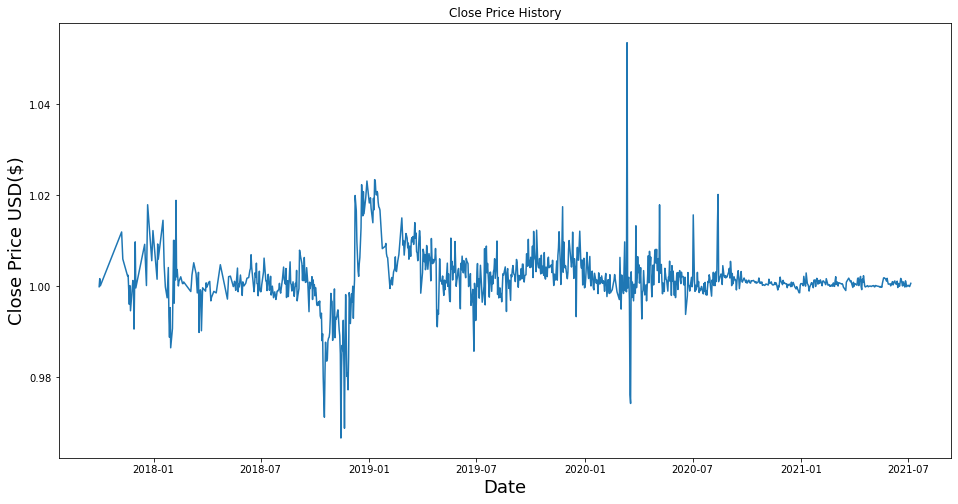

In [27]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(Datewise_NN_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show

In [28]:
#create a new df with the close columm
data = Datewise_NN_df.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
# number of rows to train
training_data_len = math.ceil( len(dataset) * .8 )

print(training_data_len)

818


In [29]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.38279   ],
       [0.40321819],
       [0.38504487],
       ...,
       [0.38404034],
       [0.38316112],
       [0.39134084]])

In [30]:
training_data_len

818

In [31]:
# create the training data_set
# scaled training dataset
train_data = scaled_data[0:training_data_len, :]

#Split the data
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<60:
        print(x_train)
        print(y_train)
        print()

In [34]:
x_train

[array([0.38279   , 0.40321819, 0.38504487, 0.52122959, 0.45279238,
        0.4102344 , 0.41172896, 0.33819653, 0.38538903, 0.32190924,
        0.3985014 , 0.38527385, 0.27561348, 0.49615523, 0.37968433,
        0.48994389, 0.38573456, 0.48959836, 0.59012751, 0.44853631,
        0.52467942, 0.40172225, 0.49086394, 0.45256203, 0.550789  ,
        0.43588327, 0.38206534, 0.35472515, 0.43128304, 0.30688752,
        0.25472527, 0.32982287, 0.22822491, 0.27723487, 0.50018095,
        0.34119868, 0.49972024, 0.39976698, 0.60116944, 0.4079336 ,
        0.42622209, 0.38469933, 0.39631578, 0.40781842, 0.39068032,
        0.39068032, 0.39482122, 0.37059767, 0.38941474, 0.41218967,
        0.44336019, 0.41529534, 0.36699769, 0.4190907 , 0.26711299,
        0.3472256 , 0.37496823, 0.37195511, 0.27134575, 0.38005248]),
 array([0.40321819, 0.38504487, 0.52122959, 0.45279238, 0.4102344 ,
        0.41172896, 0.33819653, 0.38538903, 0.32190924, 0.3985014 ,
        0.38527385, 0.27561348, 0.49615523, 0.

In [35]:
y_train

[0.3715060578763918,
 0.3925204160983835,
 0.38147848560368836,
 0.3851600432068487,
 0.3879201830411745,
 0.3932114794250108,
 0.39620197370154386,
 0.3469609693645914,
 0.3555416723368765,
 0.37095416702526585,
 0.3670552809751406,
 0.43841442523633667,
 0.35148098971424524,
 0.408048773586577,
 0.4095433351461466,
 0.38308890996306033,
 0.38584973537608214,
 0.39643095698635733,
 0.38780500582006994,
 0.3735079476717793,
 0.4299022801337582,
 0.37006839934867664,
 0.38872505243151245,
 0.3823992177938269,
 0.4123048461378662,
 0.3805241600573961,
 0.36069448182390396,
 0.39505157264789403,
 0.3848145115435351,
 0.391600369486941,
 0.4042534099197024,
 0.4058631487003801,
 0.42426682324400034,
 0.4290974107434202,
 0.4636039577233646,
 0.4324334366832687,
 0.37019523140763333,
 0.38976027626405774,
 0.4181706574698296,
 0.4064376636485072,
 0.44232496612431227,
 0.3907955000966048,
 0.3901058079273714,
 0.3599122365305707,
 0.4219660211367007,
 0.37437040567266955,
 0.370103363862226

In [36]:
# convert the x_train and y_train into numpy arrays
x_train, y_train, = np.array(x_train), np.array(y_train)

In [37]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(758, 60, 1)

# Running the Machine Learning model

In [38]:
# Building the model by importing the crucial libraries and adding different layers to LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [39]:
es = EarlyStopping(monitor = 'loss', patience = 20, verbose = 1)
# Set a seed value
seed_value= 12321

In [40]:
#Attempt 1
# adding layers to LSTM
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [41]:
# #Attempt 2
# # adding layers to LSTM
# model = Sequential()

# model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# model.add(Dense(units=1))

In [43]:
# fitting the model
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=32, callbacks = [es])

Epoch 1/100
24/24 [==============================] - 11s 112ms/step - loss: 0.0035
Epoch 2/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0036
Epoch 3/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0035
Epoch 4/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0034
Epoch 5/100
24/24 [==============================] - 2s 91ms/step - loss: 0.0034
Epoch 6/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0034
Epoch 7/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0032
Epoch 8/100
24/24 [==============================] - 2s 93ms/step - loss: 0.0032
Epoch 9/100
24/24 [==============================] - 2s 95ms/step - loss: 0.0034
Epoch 10/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0034
Epoch 11/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0032
Epoch 12/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0035
Epoch 13/100
24

24/24 [==============================] - 3s 128ms/step - loss: 0.0026
Epoch 100/100
24/24 [==============================] - 3s 131ms/step - loss: 0.0026


In [44]:
# train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
# print(f'Train accuracy: {train_acc*100:.3f} % || Test accuracy: {test_acc*100:.3f} %')
# print(f'Train loss: {train_loss:.3f} || Test loss: {test_loss:.3f}')

# Testing data

In [45]:
print(scaled_data.shape)
print(training_data_len)

(1022, 1)
818


In [46]:
print(scaled_data)

[[0.38279   ]
 [0.40321819]
 [0.38504487]
 ...
 [0.38404034]
 [0.38316112]
 [0.39134084]]


In [47]:
# create test data
# create a new array containing scaled values from index
test_data = scaled_data[training_data_len - 60:, :]

#Create the x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [48]:
print(test_data)


[[0.35894307]
 [0.39992295]
 [0.38825734]
 [0.41919606]
 [0.38567423]
 [0.41640405]
 [0.38555053]
 [0.42012647]
 [0.39584821]
 [0.42611481]
 [0.54229011]
 [0.61612043]
 [0.39543839]
 [0.41495303]
 [0.4113595 ]
 [0.38836655]
 [0.43598575]
 [0.41064133]
 [0.40638796]
 [0.41086644]
 [0.40497589]
 [0.40903782]
 [0.40708243]
 [0.42036978]
 [0.42917757]
 [0.40468732]
 [0.44686896]
 [0.42605826]
 [0.38540407]
 [0.41630573]
 [0.38984276]
 [0.39545536]
 [0.40783831]
 [0.40042083]
 [0.40111762]
 [0.39869594]
 [0.37461122]
 [0.39848904]
 [0.41226577]
 [0.42327635]
 [0.40526564]
 [0.37793832]
 [0.42119436]
 [0.40027807]
 [0.39428469]
 [0.39825004]
 [0.40054506]
 [0.40473102]
 [0.40076083]
 [0.39656073]
 [0.39348771]
 [0.39935815]
 [0.39169913]
 [0.39572728]
 [0.3964074 ]
 [0.3992988 ]
 [0.39362873]
 [0.3918007 ]
 [0.39806842]
 [0.39723084]
 [0.39864203]
 [0.39644594]
 [0.39524489]
 [0.39282162]
 [0.3957075 ]
 [0.39167716]
 [0.39268049]
 [0.39347667]
 [0.39499621]
 [0.4047638 ]
 [0.39621819]
 [0.39

In [49]:
#convert data into numpy array
x_test = np.array(x_test)

In [50]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape

(204, 60, 1)

In [51]:
# # Predicting Jan & Feb prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[1.0021116],
       [1.0021605],
       [1.0020993],
       [1.0020553],
       [1.0019597],
       [1.0020173],
       [1.0018796],
       [1.0018822],
       [1.0018824],
       [1.0019232],
       [1.0022396],
       [1.0020591],
       [1.0019292],
       [1.001979 ],
       [1.001894 ],
       [1.0019605],
       [1.0016843],
       [1.0016711],
       [1.0016146],
       [1.0015218],
       [1.0015949],
       [1.0014976],
       [1.0019419],
       [1.0017629],
       [1.001734 ],
       [1.0018443],
       [1.0016906],
       [1.0016159],
       [1.0015517],
       [1.001557 ],
       [1.0016912],
       [1.0015513],
       [1.0016843],
       [1.0015674],
       [1.0011053],
       [1.0013176],
       [1.0011569],
       [1.0019292],
       [1.0017822],
       [1.0015899],
       [1.0019194],
       [1.0017382],
       [1.0018212],
       [1.0017178],
       [1.0017177],
       [1.0013779],
       [1.0015466],
       [1.0014627],
       [1.0015259],
       [1.0015244],


In [52]:
#get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean( predictions-y_test )**2)
rmse

0.0010744719149436126

C:\Users\lavin\AppData\Local\Temp/ipykernel_2792/2633701516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

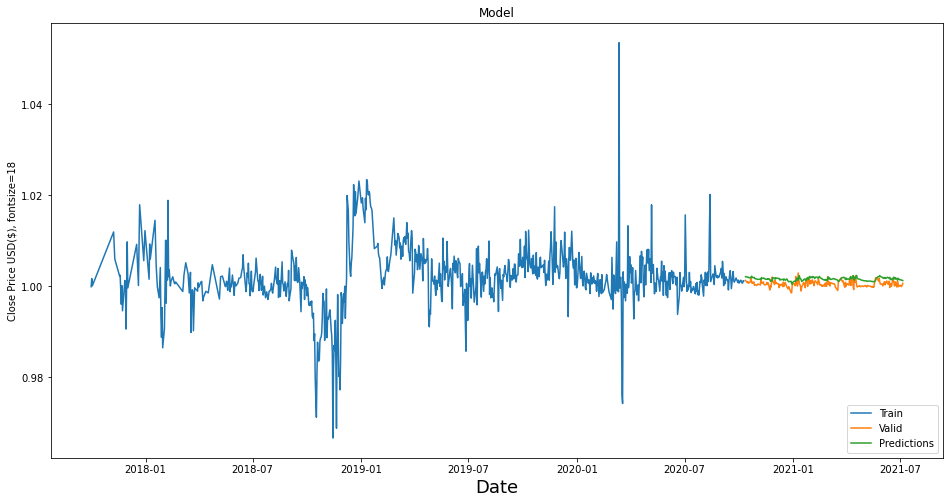

In [53]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($), fontsize=18')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show

In [54]:
# show valid and predicted 
valid

,Close,Predictions
Date,,
2020-10-12,1.001302,1.002112
2020-10-13,1.001111,1.002161
2020-10-14,1.001007,1.002099
2020-10-15,1.000796,1.002055
2020-10-16,1.001047,1.001960
...,...,...
2021-06-30,1.000216,1.001417
2021-07-01,1.000226,1.001465
2021-07-02,1.000033,1.001433


# Fetch last 60 days data from cryptocompare.com

In [55]:
# fetch data from API
api_endpoint = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=USDT&tsym=USD&limit=61&aggregate=3&e=CCCAGG&api_key='
api_endpoint += API_Key

In [56]:
# retrieve data
data_retrieved = requests.get(api_endpoint).json()
data_retrieved

{'Response': 'Success',
 'Message': '',
 'HasWarning': False,
 'Type': 100,
 'RateLimit': {},
 'Data': {'Aggregated': True,
  'TimeFrom': 1628294400,
  'TimeTo': 1644192000,
  'Data': [{'time': 1628294400,
    'high': 1.034,
    'low': 0.9255,
    'open': 1,
    'volumefrom': 138896.72,
    'volumeto': 138999.48,
    'close': 1.001,
    'conversionType': 'invert_divide',
    'conversionSymbol': 'BTC'},
   {'time': 1628553600,
    'high': 1.041,
    'low': 0.9719,
    'open': 1.001,
    'volumefrom': 584804.41,
    'volumeto': 584906.84,
    'close': 1,
    'conversionType': 'invert_divide',
    'conversionSymbol': 'ETH'},
   {'time': 1628812800,
    'high': 1.023,
    'low': 0.9259,
    'open': 1,
    'volumefrom': 369740.36,
    'volumeto': 370063.82,
    'close': 1.001,
    'conversionType': 'invert_divide',
    'conversionSymbol': 'BTC'},
   {'time': 1629072000,
    'high': 1.054,
    'low': 0.9897,
    'open': 1.001,
    'volumefrom': 96099.64,
    'volumeto': 96134.95,
    'close'

In [57]:
data_retrieved_json = data_retrieved['Data']['Data']
data_retrieved_json

[{'time': 1628294400,
  'high': 1.034,
  'low': 0.9255,
  'open': 1,
  'volumefrom': 138896.72,
  'volumeto': 138999.48,
  'close': 1.001,
  'conversionType': 'invert_divide',
  'conversionSymbol': 'BTC'},
 {'time': 1628553600,
  'high': 1.041,
  'low': 0.9719,
  'open': 1.001,
  'volumefrom': 584804.41,
  'volumeto': 584906.84,
  'close': 1,
  'conversionType': 'invert_divide',
  'conversionSymbol': 'ETH'},
 {'time': 1628812800,
  'high': 1.023,
  'low': 0.9259,
  'open': 1,
  'volumefrom': 369740.36,
  'volumeto': 370063.82,
  'close': 1.001,
  'conversionType': 'invert_divide',
  'conversionSymbol': 'BTC'},
 {'time': 1629072000,
  'high': 1.054,
  'low': 0.9897,
  'open': 1.001,
  'volumefrom': 96099.64,
  'volumeto': 96134.95,
  'close': 1,
  'conversionType': 'invert_divide',
  'conversionSymbol': 'BTC'},
 {'time': 1629331200,
  'high': 1.02,
  'low': 0.9407,
  'open': 1,
  'volumefrom': 92555.22,
  'volumeto': 92596.69,
  'close': 1.001,
  'conversionType': 'invert_divide',
  'co

In [58]:
last_60_days = pd.json_normalize(data_retrieved_json)
last_60_days

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1628294400,1.034,0.9255,1.000,138896.72,138999.48,1.001,invert_divide,BTC
1,1628553600,1.041,0.9719,1.001,584804.41,584906.84,1.000,invert_divide,ETH
2,1628812800,1.023,0.9259,1.000,369740.36,370063.82,1.001,invert_divide,BTC
3,1629072000,1.054,0.9897,1.001,96099.64,96134.95,1.000,invert_divide,BTC
4,1629331200,1.020,0.9407,1.000,92555.22,92596.69,1.001,invert_divide,BTC
...,...,...,...,...,...,...,...,...,...
57,1643068800,1.058,0.9563,1.001,148029.16,148134.83,1.001,invert_divide,BTC
58,1643328000,1.015,0.9592,1.001,80305.40,80357.57,1.000,invert_divide,BTC
59,1643587200,1.050,0.9531,1.000,479541.59,479758.52,1.000,invert_divide,BTC
60,1643846400,1.014,0.8919,1.001,100229.45,100308.44,1.001,invert_divide,BTC


In [59]:
last_60_days

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1628294400,1.034,0.9255,1.000,138896.72,138999.48,1.001,invert_divide,BTC
1,1628553600,1.041,0.9719,1.001,584804.41,584906.84,1.000,invert_divide,ETH
2,1628812800,1.023,0.9259,1.000,369740.36,370063.82,1.001,invert_divide,BTC
3,1629072000,1.054,0.9897,1.001,96099.64,96134.95,1.000,invert_divide,BTC
4,1629331200,1.020,0.9407,1.000,92555.22,92596.69,1.001,invert_divide,BTC
...,...,...,...,...,...,...,...,...,...
57,1643068800,1.058,0.9563,1.001,148029.16,148134.83,1.001,invert_divide,BTC
58,1643328000,1.015,0.9592,1.001,80305.40,80357.57,1.000,invert_divide,BTC
59,1643587200,1.050,0.9531,1.000,479541.59,479758.52,1.000,invert_divide,BTC
60,1643846400,1.014,0.8919,1.001,100229.45,100308.44,1.001,invert_divide,BTC


In [60]:
last_60_days["Rev_time"] = pd.to_datetime(last_60_days['time'],unit='s')
last_60_days["Date"] = last_60_days['Rev_time'].dt.date

last_60_days = last_60_days.set_index('Date')
Data_Close_last_60 = last_60_days.filter(['close'])
Data_Close_last_60

,close
Date,
2021-08-07,1.001
2021-08-10,1.000
2021-08-13,1.001
2021-08-16,1.000
2021-08-19,1.001
...,...
2022-01-25,1.001
2022-01-28,1.000
2022-01-31,1.000


In [61]:
Close_last_60 = Data_Close_last_60[:60].values
Close_last_60

array([[1.001 ],
       [1.    ],
       [1.001 ],
       [1.    ],
       [1.001 ],
       [0.9998],
       [1.001 ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.001 ],
       [1.    ],
       [1.    ],
       [1.    ],
       [0.9964],
       [1.001 ],
       [1.001 ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.001 ],
       [1.001 ],
       [1.001 ],
       [1.001 ],
       [1.001 ],
       [1.    ],
       [1.001 ],
       [1.002 ],
       [1.001 ],
       [1.001 ],
       [1.001 ],
       [1.001 ],
       [1.001 ],
       [1.001 ],
       [1.001 ],
       [1.001 ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.001 ],
       [0.9999],
       [0.9997],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.001 ],
       [1.    ],
       [1.001 ],
       [1.001 ],
       [1.    

In [62]:
# scale the close_last_60 data
Close_last_60_scaled = scaler.transform(Close_last_60)
# create an empty list
X_test = []
# Append the last 60 days
# for i in range(60, len(Close_last_60_scaled)):
#     X_test.append(Close_last_60_scaled[i-60:i, 0])
X_test.append(Close_last_60_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(f"Price prediction for 3rd Feb is {pred_price} and actual price is $1.001")

Price prediction for 3rd Feb is [[1.001292]] and actual price is $1.001


In [63]:
X_test
X_test.shape

(1, 60, 1)

In [64]:
print(len(Data_Close_last_60))
print(len(pred_price))

62
1


In [65]:
new_valid = Data_Close_last_60
# new_valid['Predictions'] = pred_price
new_valid

,close
Date,
2021-08-07,1.001
2021-08-10,1.000
2021-08-13,1.001
2021-08-16,1.000
2021-08-19,1.001
...,...
2022-01-25,1.001
2022-01-28,1.000
2022-01-31,1.000
